<a href="https://colab.research.google.com/github/pramodsingh0507/Assignment_Datastrucures/blob/main/Boosting_Techniques_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ques 14) Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.905


In [2]:
# Ques 15) Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 58.859025365662376


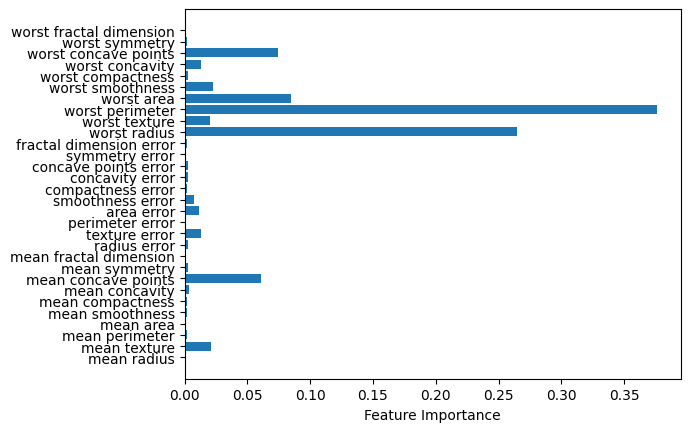

In [3]:
# Ques 16) Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

plt.barh(data.feature_names, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.show()



In [4]:
# Ques 17) Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=20, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.932351148529223


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Ques 18) Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


XGBoost Accuracy: 0.925
Gradient Boosting Accuracy: 0.92


In [10]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [11]:
# Ques 19- Train a CatBoost Classifier and evaluate using F1-Score.
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_state=42)  # silent training
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.9790


In [12]:
# Ques 20- Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.04869866371154785


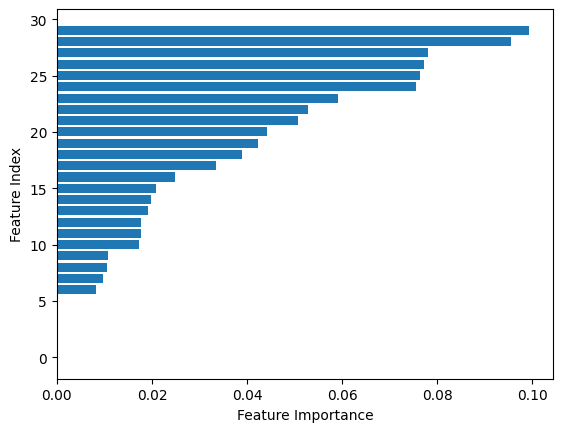

In [13]:
# Ques 21) Train an AdaBoost Classifier and visualize feature importance.

import numpy as np

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(importances)), importances[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.show()


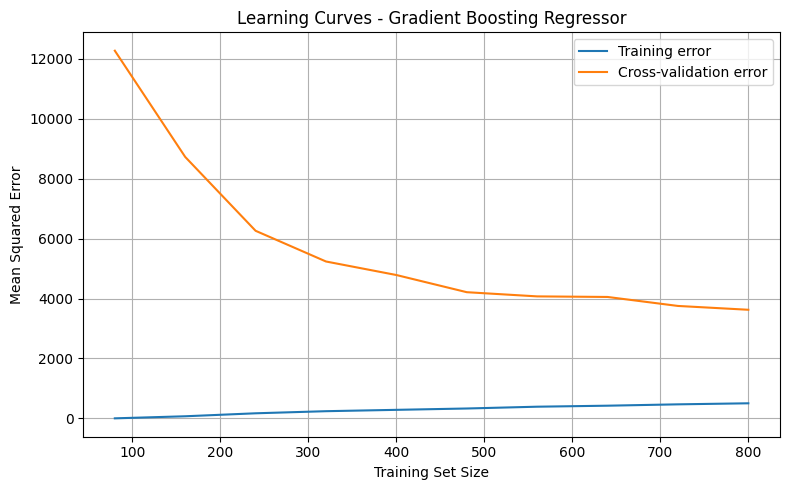

In [15]:
# Ques 22) Train a Gradient Boosting Regressor and plot learning curves.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# 2. Initialize model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 3. Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# 4. Calculate mean and std deviation
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# 5. Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves - Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


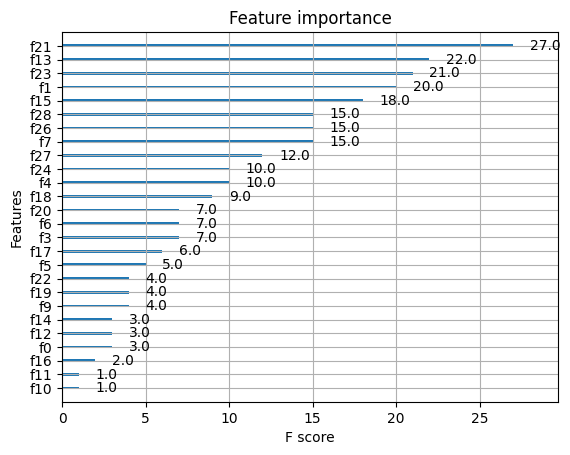

In [16]:
# Ques 23) Train an XGBoost Classifier and visualize feature importance.

from xgboost import plot_importance

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

plot_importance(model)
plt.show()


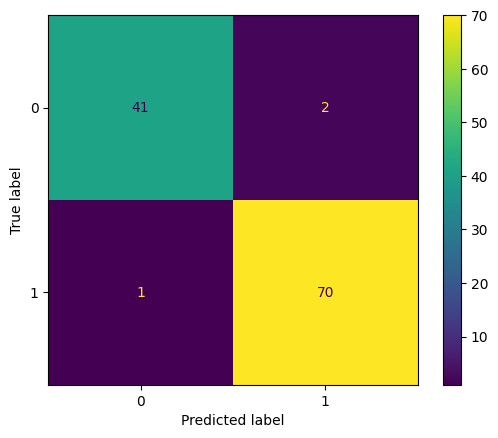

In [17]:
#Ques 24)  Train a CatBoost Classifier and plot the confusion matrix.

from sklearn.metrics import ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


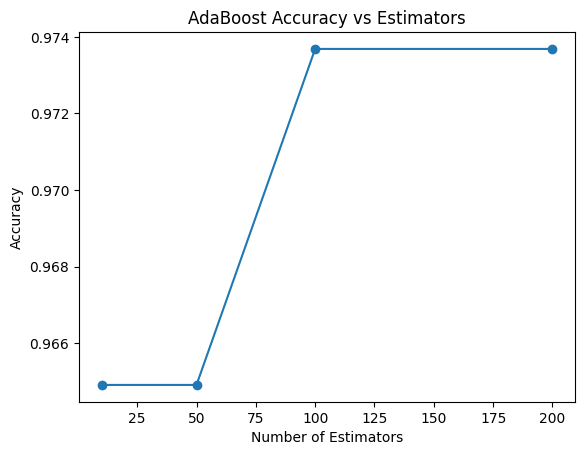

In [18]:
# Ques 25) Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

plt.plot(estimators, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Estimators")
plt.show()


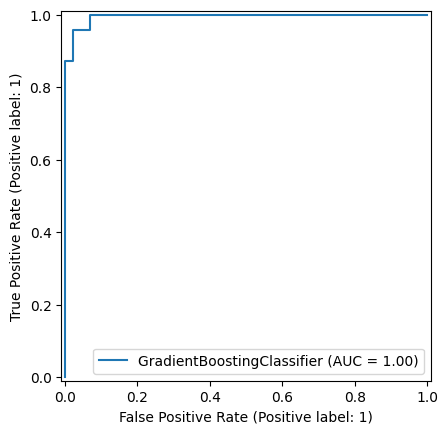

In [19]:
# Ques 26) Train a Gradient Boosting Classifier and visualize the ROC curve.

from sklearn.metrics import RocCurveDisplay

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [20]:
# Ques 27) Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best Score:", -grid.best_score_)


Best Learning Rate: 0.3
Best Score: 0.0509707381327947


In [21]:
# Ques 28) Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming binary classification
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

model = CatBoostClassifier(auto_class_weights='Balanced', verbose=0)
model.fit(X_train, y_train)
print("F1 Score with Balanced Weights:", f1_score(y_test, model.predict(X_test)))


F1 Score with Balanced Weights: 0.9790209790209791


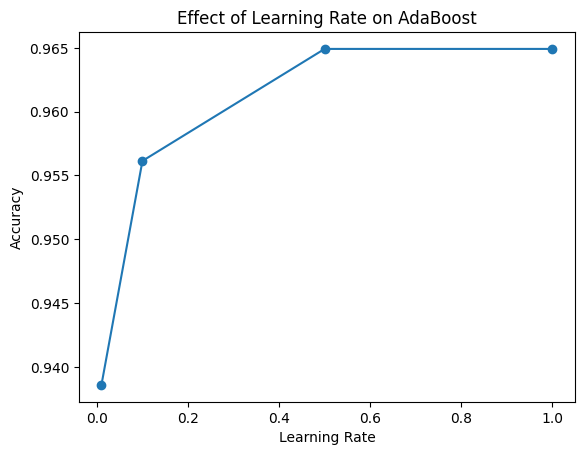

In [22]:
# Ques 29) Train an AdaBoost Classifier and analyze the effect of different learning rates.

rates = [0.01, 0.1, 0.5, 1.0]
accuracies = []

for rate in rates:
    model = AdaBoostClassifier(learning_rate=rate)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

plt.plot(rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost")
plt.show()


In [23]:
# Ques 30)Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

model = XGBClassifier(objective='multi:softprob', num_class=10, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_pred_proba))


Log Loss: 0.09494650251068193
